# Chapter 6 - Linear Model Selection and Regularization

- [Lab 3: Principal Components Regression](#6.7.1-Principal-Components-Regression)
- [Lab 3: Partial Least Squares](#6.7.2-Partial-Least-Squares)

In [38]:
!pip install glmnet # install glmnet before import

In [39]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import glmnet as gln

from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error

%matplotlib inline
plt.style.use('seaborn-white')

### 6.7.1 Principal Components Regression

Scikit-klearn does not have an implementation of PCA and regression combined like the 'pls' package in R.
https://cran.r-project.org/web/packages/pls/vignettes/pls-manual.pdf

In [40]:
# In R, I exported the dataset from package 'ISLR' to a csv file.
df = pd.read_csv('https://raw.githubusercontent.com/borisgarbuzov/schulich_data_science_1/master/Data/Hitters.csv', index_col=0).dropna()
df.index.name = 'Player'
dummies = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

y = df.Salary

# Drop the column with the independent variable (Salary), and columns for which we created dummy variables
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
# Define the feature set X.
X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

In [41]:
pca = PCA()
print("type(X) =", type(X))
print("X.shape =", X.shape)
X_reduced = pca.fit_transform(scale(X))
# print("X_reduced: \n", X_reduced)
print("type(X_reduced) =", type(X_reduced))
print("X_reduced.shape =", X_reduced.shape)

print(pca.components_.shape)
squareMatrix = pd.DataFrame(pca.components_.T)
squareMatrix.loc[:4,:5]

type(X) = <class 'pandas.core.frame.DataFrame'>
X.shape = (263, 19)
type(X_reduced) = <class 'numpy.ndarray'>
X_reduced.shape = (263, 19)
(19, 19)


,0,1,2,3,4,5
0,0.198290,-0.383784,0.088626,0.031967,0.028117,-0.070646
1,0.195861,-0.377271,0.074032,0.017982,-0.004652,-0.082240
2,0.204369,-0.237136,-0.216186,-0.235831,0.077660,-0.149646
3,0.198337,-0.377721,-0.017166,-0.049942,-0.038536,-0.136660
4,0.235174,-0.314531,-0.073085,-0.138985,0.024299,-0.111675


In [42]:
squareMatrix.round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.20,-0.38,0.09,0.03,0.03,-0.07,0.11,0.27,-0.01,0.15,0.10,0.10,-0.04,0.31,0.53,-0.51,0.14,-0.11,0.05
1,0.20,-0.38,0.07,0.02,-0.00,-0.08,0.13,0.39,-0.06,0.13,0.01,0.12,0.00,0.21,-0.02,0.72,-0.17,0.04,-0.10
2,0.20,-0.24,-0.22,-0.24,0.08,-0.15,-0.51,-0.23,0.13,-0.35,-0.20,-0.31,-0.11,-0.00,0.36,0.20,0.05,-0.06,-0.02
3,0.20,-0.38,-0.02,-0.05,-0.04,-0.14,0.20,0.11,-0.17,0.03,-0.31,-0.32,-0.38,-0.27,-0.47,-0.22,0.14,0.05,0.06
4,0.24,-0.31,-0.07,-0.14,0.02,-0.11,-0.32,0.01,0.13,-0.17,0.24,0.35,0.44,-0.01,-0.46,-0.24,-0.11,0.06,0.02
5,0.21,-0.23,0.05,-0.13,-0.03,-0.02,0.56,-0.62,-0.02,-0.12,0.18,0.19,0.04,-0.24,0.18,0.10,-0.04,0.01,-0.02
6,0.28,0.26,0.03,0.10,-0.01,0.03,-0.01,0.14,-0.01,-0.51,0.19,0.35,-0.61,0.09,-0.07,-0.02,-0.10,-0.09,0.02
7,0.33,0.19,0.08,0.09,0.01,0.02,0.01,0.15,-0.05,-0.10,-0.03,-0.06,0.15,-0.17,0.16,-0.06,0.18,0.72,-0.41
8,0.33,0.18,0.09,0.08,0.01,0.03,0.02,0.19,-0.09,-0.08,-0.03,-0.08,0.27,-0.29,0.14,0.11,0.03,-0.00,0.77
9,0.32,0.13,-0.09,-0.07,0.03,-0.04,-0.23,-0.25,0.17,0.65,0.08,0.07,-0.33,0.04,-0.01,-0.03,-0.29,0.25,0.17


The above loadings are the same as in R.

In [43]:
print(X_reduced.shape)
pd.DataFrame(X_reduced).loc[:4,:5]

(263, 19)


,0,1,2,3,4,5
0,-0.009649,1.870522,1.265145,-0.935481,1.109636,1.211972
1,0.411434,-2.429422,-0.909193,-0.264212,1.232031,1.826617
2,3.466822,0.825947,0.555469,-1.616726,-0.857488,-1.028712
3,-2.558317,-0.230984,0.519642,-2.176251,-0.820301,1.491696
4,1.027702,-1.573537,1.331382,3.494004,0.983427,0.513675


The above principal components are the same as in R.

In [44]:
# Variance explained by the principal components
print(pca.explained_variance_ratio_.round(2))
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

[0.38 0.22 0.11 0.08 0.05 0.04 0.04 0.03 0.01 0.01 0.01 0.01 0.01 0.
 0.   0.   0.   0.   0.  ]


array([38.31, 60.15, 70.84, 79.03, 84.29, 88.63, 92.26, 94.96, 96.28,
       97.25, 97.97, 98.64, 99.14, 99.46, 99.73, 99.88, 99.95, 99.98,
       99.99])

In [45]:
x = np.array([1, 2, 3])
np.cumsum(x)


array([1, 3, 6])

Try to do the same as the book does with the principal components, but with the original X.
I hope that this time we have the gradually declining curve. 
For now we do not scale X. 

n = 263


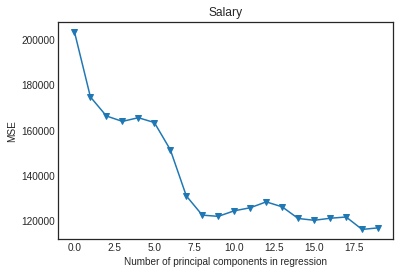

In [46]:
# 10-fold CV, with shuffle
X = X.values
n = len(X)
print("n =", n)
kf_10 = KFold(n_splits=10, shuffle=True, random_state=1)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*cross_val_score(regr, np.ones((n,1)), y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for the 19 original columns, adding one component at the time.
for i in np.arange(1, 20):
    score = -1*cross_val_score(regr, X[:,:i], y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
plt.plot(mse, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Salary')
plt.xlim(xmin=-1);

n = 263


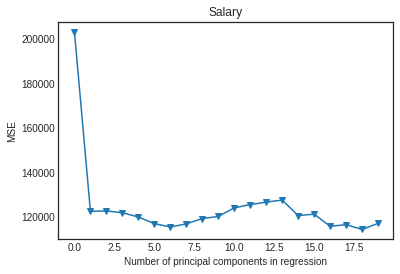

In [47]:
# 10-fold CV, with shuffle
n = len(X_reduced)
print("n =", n)
kf_10 = KFold(n_splits=10, shuffle=True, random_state=1)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*cross_val_score(regr, np.ones((n,1)), y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for the 19 principle components, adding one component at the time.
for i in np.arange(1, 20):
    score = -1*cross_val_score(regr, X_reduced[:,:i], y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
plt.plot(mse, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Salary')
plt.xlim(xmin=-1);

The above plot indicates that the lowest training MSE is reached when doing regression on 18 components.

In [48]:
regr_test = LinearRegression()
regr_test.fit(X_reduced, y)
regr_test.coef_

array([ 106.36859204,  -21.60350456,   24.2942534 ,  -36.9858579 ,
        -58.41402748,   62.20632652,   24.63862038,   15.82817701,
         29.57680773,   99.64801199,  -30.11209105,   20.99269291,
         72.40210574, -276.68551696,  -74.17098665,  422.72580227,
       -347.05662353, -561.59691587,  -83.25441536])

#### Fitting PCA with training data

In [49]:
X_train = pd.read_csv('https://raw.githubusercontent.com/borisgarbuzov/schulich_data_science_1/master/Data/Hitters_X_train.csv', index_col=0)
y_train = pd.read_csv('https://raw.githubusercontent.com/borisgarbuzov/schulich_data_science_1/master/Data/Hitters_y_train.csv', index_col=0)
X_test = pd.read_csv('https://raw.githubusercontent.com/borisgarbuzov/schulich_data_science_1/master/Data/Hitters_X_test.csv', index_col=0)
y_test = pd.read_csv('https://raw.githubusercontent.com/borisgarbuzov/schulich_data_science_1/master/Data/Hitters_y_test.csv', index_col=0)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


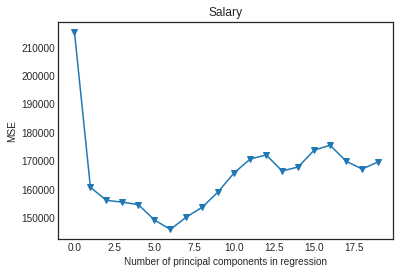

In [50]:
pca2 = PCA()
X_reduced_train = pca2.fit_transform(scale(X_train))
n = len(X_reduced_train)

# 10-fold CV, with shuffle
kf_10 = KFold(n_splits=10, shuffle=False, random_state=1)

mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*cross_val_score(regr, np.ones((n,1)), y_train, cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for the 19 principle components, adding one component at the time.
for i in np.arange(1, 20):
    score = -1*cross_val_score(regr, X_reduced_train[:,:i], y_train, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)

plt.plot(np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Salary')
plt.xlim(xmin=-1);

The above plot indicates that the lowest training MSE is reached when doing regression on 6 components.

#### Transform test data with PCA loadings and fit regression on 6 principal components

In [51]:
X_reduced_test = pca2.transform(scale(X_test))[:,:7]

# Train regression model on training data 
regr = LinearRegression()
regr.fit(X_reduced_train[:,:7], y_train)

# Prediction with test data
pred = regr.predict(X_reduced_test)
mean_squared_error(y_test, pred)

96320.02078250323

### 6.7.2 Partial Least Squares

Scikit-learn PLSRegression gives same results as the pls package in R when using 'method='oscorespls'. In the LAB excercise, the standard method is used which is 'kernelpls'. 

When doing a slightly different fitting in R, the result is close to the one obtained using scikit-learn.

    pls.fit=plsr(Salary~., data=Hitters, subset=train, scale=TRUE, validation="CV", method='oscorespls')
    validationplot(pls.fit,val.type="MSEP", intercept = FALSE)
   
See documentation:
http://scikit-learn.org/dev/modules/generated/sklearn.cross_decomposition.PLSRegression.html#sklearn.cross_decomposition.PLSRegression

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


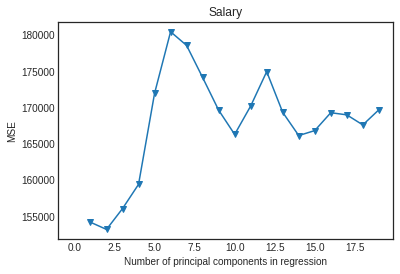

In [52]:
n = len(X_train)

# 10-fold CV, with shuffle
kf_10 = KFold(n_splits=10, shuffle=False, random_state=1)

mse = []

for i in np.arange(1, 20):
    pls = PLSRegression(n_components=i)
    score = cross_val_score(pls, scale(X_train), y_train, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(-score)

plt.plot(np.arange(1, 20), np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Salary')
plt.xlim(xmin=-1);

In [53]:
pls = PLSRegression(n_components=2)
pls.fit(scale(X_train), y_train)

mean_squared_error(y_test, pls.predict(scale(X_test)))

102234.27995999217